In [3]:
import os 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [4]:
os.chdir('C:/Users/Alexandre/Desktop/DATA FAC/cours/')
# ce qui me permet d'accéder directement au dataset à l'intérieur de mon dossier "cours"
heart_df = pd.read_csv('heart.csv')

# About dataset

* Age : Age of the patient

* Sex : Sex of the patient

* exang: exercise induced angina (1 = yes; 0 = no)

* ca: number of major vessels (0-3)

* cp : Chest Pain type chest pain type

        Value 1: typical angina
        Value 2: atypical angina
        Value 3: non-anginal pain
        Value 4: asymptomatic

* trtbps : resting blood pressure (in mm Hg)

* chol : cholestoral in mg/dl fetched via BMI sensor

* fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

* rest_ecg : resting electrocardiographic results

        Value 0: normal
        Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
        

* thalach : maximum heart rate achieved

#### output (target) : 0= less chance of heart attack 1= more chance of heart attack

In [5]:
heart_df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### q1 : inspecter le dataframe et la target (output)

In [6]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
heart_df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
heart_df['output'].value_counts('pct')

1    0.544554
0    0.455446
Name: output, dtype: float64

In [9]:
heart_df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

### q2 : créer une table avec l'âge (age) et le rythme cardiaque (thalachh) moyen, maximal, minimal par sexe et  analyser les résultats

In [10]:
tmp_stats_by_sex = heart_df.groupby('sex')[["age", "thalachh"]].agg(["mean", "min", "max"])
tmp_stats_by_sex

age            thalachh         
          mean min max        mean min  max
sex                                        
0    55.677083  34  76  151.125000  96  192
1    53.758454  29  77  148.961353  71  202

### q3 : croiser les données de sexe, de douleur à la poitrine et d'arrêt cardiaque afin d'en tirer une information 

In [11]:
pd.DataFrame(heart_df.groupby(['sex', "output"])["cp"].value_counts('pct').round(2)*100)

cp
sex output cp      
0   0      0   88.0
           1    8.0
           2    4.0
    1      2   47.0
           0   25.0
           1   22.0
           3    6.0
1   0      0   73.0
           2   15.0
           1    6.0
           3    6.0
    1      2   38.0
           1   27.0
           0   23.0
           3   13.0

on constate que la modalitée n°2 quelques soit le sex à un impact assez elevée sur la probabilitée d'arrêt cardiaque 

### q4 : créer des classes d'ages et l'assigner à une nouvelle colonne "age_bins" (indice : utiliser la fonction pd.cut ou pd.qcut)

In [12]:
heart_df["age_bins"] = pd.cut(heart_df["age"], [0, 10, 20, 30, 50, 70, 100])
heart_df["age_bins"]

0      (50, 70]
1      (30, 50]
2      (30, 50]
3      (50, 70]
4      (50, 70]
         ...   
298    (50, 70]
299    (30, 50]
300    (50, 70]
301    (50, 70]
302    (50, 70]
Name: age_bins, Length: 303, dtype: category
Categories (6, interval[int64]): [(0, 10] < (10, 20] < (20, 30] < (30, 50] < (50, 70] < (70, 100]]

### q5 - recommencer la question 3  avec l'âge à la place du sexe 

In [13]:
pd.DataFrame(heart_df.groupby(['age_bins', "output"])["cp"].value_counts('pct').round(2)*100)

cp
age_bins  output cp       
(20, 30]  1      1   100.0
(30, 50]  0      0    72.0
                 2    17.0
                 3     7.0
                 1     3.0
          1      2    42.0
                 1    32.0
                 0    22.0
                 3     5.0
(50, 70]  0      0    76.0
                 2    12.0
                 1     7.0
                 3     5.0
          1      2    43.0
                 0    26.0
                 1    18.0
                 3    14.0
(70, 100] 0      0   100.0
          1      1    40.0
                 2    40.0
                 0    20.0

### q6 : calculer la moyenne du rythme cardiaque maximal constaté par sexe et l'ajouter en tant que colonne du dataframe 

In [14]:
heart_df['avg_sex_tallach'] = heart_df.groupby('sex')["thalachh"].transform('mean')

### q7 : observer la distribution du cholesterol dans le dataframe en utilisant seaborn 

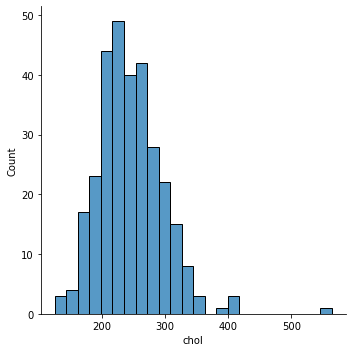

In [16]:
import seaborn as sns 
sns.displot(heart_df['chol'])

### q6 : appliquer une transformation logarithmique à cette colonne et ré-executer votre graphique 

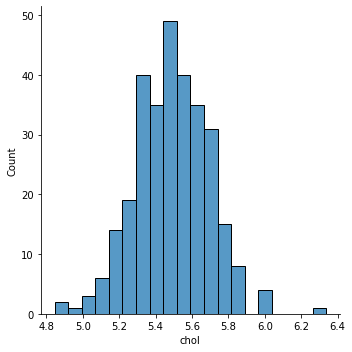

In [78]:
sns.displot(np.log1p(heart_df['chol']))

### q8 : créer une colonne binaire (1, 0) où 1 est égal à la catégorie cp = 2  et l'age >= 50 ans,  sinon 0

In [25]:
cond1 = heart_df["cp"]==2
cond2 = heart_df["age"]>=50
condition_combine = np.logical_and(
        heart_df["cp"]==2, heart_df["age"]>=50,
    )

In [21]:
heart_df["new_col"] = np.where(condition_combine, 1, 0)

heart_df["new_col"].value_counts("pct")

0    0.808581
1    0.191419
Name: new_col, dtype: float64

### q9: analyser les corrélations des variables avec la cible sous forme de tableau ou de graphique, analysé vos résultats

In [26]:
corr_table = heart_df.corr()
corr_table

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,avg_sex_tallach,new_col
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439,0.098447,0.234771
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937,-1.000000,-0.119434
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798,0.049353,0.487808
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931,0.056769,0.028182
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239,0.197912,0.052476
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046,-0.045032,0.150650
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230,0.058196,-0.010020
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741,0.044020,0.019987
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757,-0.141664,-0.195860
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696,-0.096093,-0.062217


<AxesSubplot:>

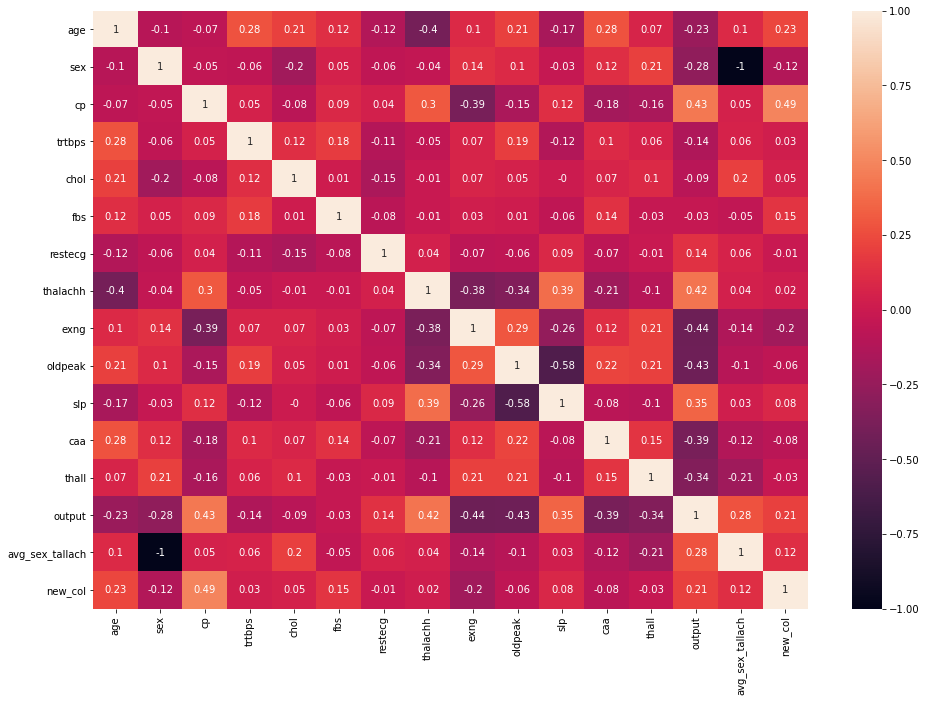

In [29]:
import seaborn as sns 

plt.figure(figsize=(16, 11))
sns.heatmap(corr_table.round(2), annot=True)

### q10 : avec matplotlib créer un nuage de points de l'âge et du cholestérol afin de trouver visuellement des valeurs abérrante, (supprimé/filtré)-les et ré-affiché votre graphique ajusté.

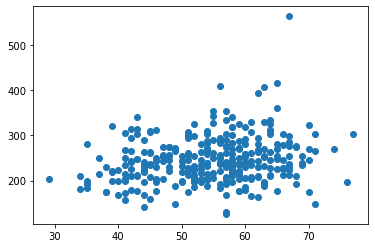

In [30]:
plt.scatter(heart_df.age, heart_df.chol)

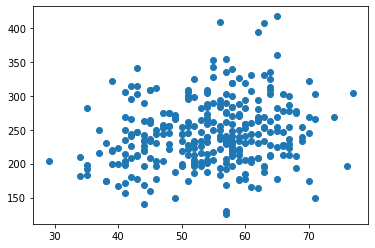

In [31]:
plt.scatter(heart_df[(heart_df["chol"] <= 500)].age, heart_df[(heart_df["chol"] <= 500)].chol)